In [43]:
import scipy.fftpack
import scipy as sp

import numpy as np
from numpy import ravel
from scipy import signal
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt


from scipy.signal import resample
from scipy.interpolate import interp1d

from sklearn import preprocessing
from sklearn.preprocessing import normalize
%matplotlib notebook



import plotly as py
from scipy.signal import find_peaks
import plotly.graph_objects as go

from matplotlib import style
from matplotlib.patches import Ellipse
from statistics import mean


import biosppy

from scipy.signal import butter, lfilter, lfilter_zi
import neurokit2 as nk


In [44]:
clean = pd.read_csv("ecg_ppg_clean.csv")
# clean_ppg1 = pd.read_csv("ecg_ppg_clean.csv", names = ["timestamps_ppg_1_green", "ppg_1_green", "timestamps_ppg_1_red" , 
#                                                        "ppg_1_red", "timestamps_ppg_1_ir", " ppg_1_ir""])
clean_ecg = clean.loc[0: ,["timestamps_ecg", "ecg"]]
clean_ppg1 = clean.loc[0: ,["timestamps_ppg_1_green", "ppg_1_green", "timestamps_ppg_1_red" , 
                                                      "ppg_1_red", "timestamps_ppg_1_ir", "ppg_1_ir"]]
clean_ppg2 = clean.loc[0: ,["timestamps_ppg_2_green", "ppg_2_green", "timestamps_ppg_2_red" , 
                                                      "ppg_2_red", "timestamps_ppg_2_ir", "ppg_2_ir"]]
#clean.head() #check that we sampled the columns correctly
#clean.head()

In [45]:
motion = pd.read_csv("ecg_ppg_motion.csv")
motion_ecg = motion.loc[0: ,["timestamps_ecg", "ecg"]]
motion_ppg1 = motion.loc[0: ,["timestamps_ppg_1_green", "ppg_1_green", "timestamps_ppg_1_red" , 
                                                      "ppg_1_red", "timestamps_ppg_1_ir", "ppg_1_ir"]]
motion_ppg2 = motion.loc[0: ,["timestamps_ppg_2_green", "ppg_2_green", "timestamps_ppg_2_red" , 
                                                      "ppg_2_red", "timestamps_ppg_2_ir", "ppg_2_ir"]]
#motion_ppg1.head()
#motion.head()

In [46]:
#plot the data
x=clean_ecg['timestamps_ecg'].dropna().to_numpy()
y=clean_ecg['ecg'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("ECG Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x,y)

x1=clean_ppg1['timestamps_ppg_1_green'].dropna().to_numpy()
y1=clean_ppg1['ppg_1_green'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG1_Green Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x1,y1)

x2=clean_ppg1['timestamps_ppg_1_red'].dropna().to_numpy()
y2=clean_ppg1['ppg_1_red'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG1_Red Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x2,y2)

x3=clean_ppg1['timestamps_ppg_1_ir'].dropna().to_numpy()
y3=clean_ppg1['ppg_1_ir'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG1_ir Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x3,y3)

x4=clean_ppg2['timestamps_ppg_2_green'].dropna().to_numpy()
y4=clean_ppg2['ppg_2_green'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG2_Green Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x4,y4)

x5=clean_ppg2['timestamps_ppg_2_red'].dropna().to_numpy()
y5=clean_ppg2['ppg_2_red'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG2_Red Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x5,y5)

x6=clean_ppg2['timestamps_ppg_2_ir'].dropna().to_numpy()
y6=clean_ppg2['ppg_2_ir'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG2_ir Clean",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(x6,y6)

In [47]:

a=motion_ecg['timestamps_ecg'].dropna().to_numpy()
b=motion_ecg['ecg'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("ECG Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a,b)

a1=motion_ppg1['timestamps_ppg_1_green'].dropna().to_numpy()
b1=motion_ppg1['ppg_1_green'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG1_Green Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a1,b1)

a2=motion_ppg1['timestamps_ppg_1_red'].dropna().to_numpy()
b2=motion_ppg1['ppg_1_red'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG1_Red Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a2,b2)

a3=motion_ppg1['timestamps_ppg_1_ir'].dropna().to_numpy()
b3=motion_ppg1['ppg_1_ir'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG1_ir Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a3,b3)

a4=motion_ppg2['timestamps_ppg_2_green'].dropna().to_numpy()
b4=motion_ppg2['ppg_2_green'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG2_Green Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a4,b4)

a5=motion_ppg2['timestamps_ppg_2_red'].dropna().to_numpy()
b5=motion_ppg2['ppg_2_red'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG2_Red Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a5,b5)

a6=motion_ppg2['timestamps_ppg_2_ir'].dropna().to_numpy()
b6=motion_ppg2['ppg_2_ir'].dropna().to_numpy()


# plt.figure(figsize=(40,15))
# plt.title("PPG2_ir Motion",fontsize=25)
# plt.xlabel("Time",fontsize=25)
# plt.ylabel("Sample",fontsize=25)
# plt.plot(a6,b6)

In [48]:
minmax_timestamp = (np.amin((np.amax(x),np.amax(x1),np.amax(x2),np.amax(x3),np.amax(x4),np.amax(x5),np.amax(x6),
                                np.amax(a),np.amax(a1),np.amax(a2),np.amax(a3),np.amax(a4),np.amax(a5),np.amax(a6)))
                   )/10**4
fs=200
time_new=np.arange(fs*(minmax_timestamp-x1[0]/10**4))*(1/fs)







In [49]:

def resample (old_time,old_sig, name):
    f_interpolate = interpolate.interp1d((old_time-np.min(old_time))/10000, old_sig, kind='cubic')
#     plt.figure(figsize=(8,5))
#     plt.title("Plot for the Resampled "+name+" signal")
#     plt.xlabel("Time [s]")
#     plt.xticks()
#     plt.ylabel("Normalized Signal Amplitude")
#     plt.yticks()
    resampled_signal = f_interpolate(time_new)
#     plt.plot(time_new,resampled_signal)
#     plt.show()
    
    return (resampled_signal)


resampled_ecg = resample(x,y,"Clean ECG")
resampled_ppg = resample(x1,y1,"Clean PPG1 Green")
#resampled_ppg1_g_motion = resample(a1,b1,"Motion PPG1 Green")

In [50]:
#code (provided from the biosignals lab)

def _slicing(sig, segment_length):
    

    """
    inputs:
    sig : input array to be segmented
    file_label : label to be applied to segmented signal
    segment_length : Length in samples of the segments produced from the input signal = 10*200 = 2000
    
    outputs:
    sig_sliced : a list of segments
    label : a list of corresponding labels for the segmented signal 
    
    """

    sig_sliced = []
   
    
    # slicing 
    
    for i in np.arange(int(len(sig)/segment_length)):

        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )


        
    return (sig_sliced)

In [51]:
def plot_slic(slices):
 
    tmax = 0
    for i,j in enumerate(slices):
        if(tmax == 0):
            t = np.linspace(0,len(j)/fs,len(j))
            tmax = t[-1]
        if(tmax != 0):
            t = np.linspace(tmax,tmax+len(j)/fs,len(j))
            tmax = t[-1]
        plt.plot(t,j)
    return()

<IPython.core.display.Javascript object>


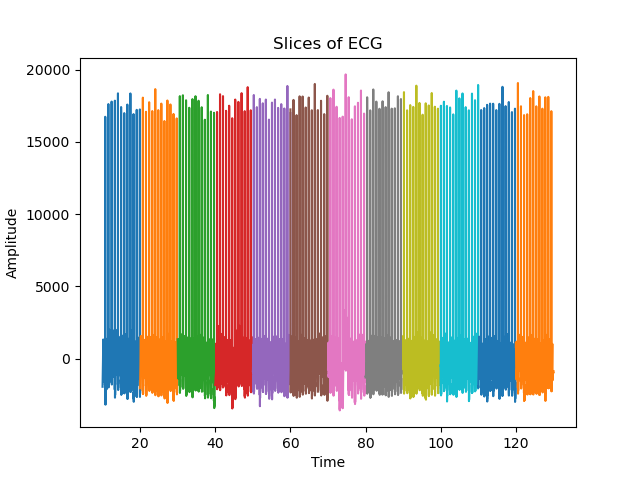

<IPython.core.display.Javascript object>


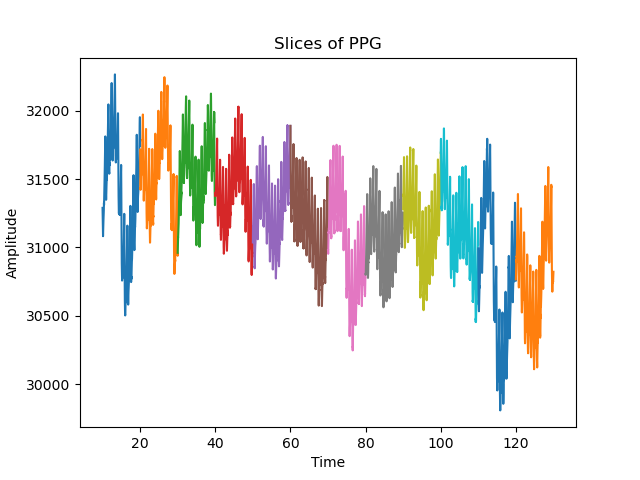

<function matplotlib.pyplot.show(block=None)>

In [52]:
fs=200
sliced_signal_ecg = []
sliced_signal_ppg = []
#print(resampled_ecg)
sliced_signal_ecg.append(_slicing(resampled_ecg, 2000))
sliced_signal_ppg.append(_slicing(resampled_ppg, 2000))
sliced_signal_ecg=sliced_signal_ecg[0]
sliced_signal_ppg=sliced_signal_ppg[0]
#print(sliced_signal_ecg)

plt.figure()
plt.title("Slices of ECG")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plot_slic(sliced_signal_ecg)
#plt.plot(resampled_ecg)
plt.show
plt.figure()
plt.title("Slices of PPG")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plot_slic(sliced_signal_ppg)
#plt.plot(resampled_ecg)

plt.show

<br><br>2. Compute ensemble averaged waveform of the heart beats (align found beats from maxima plot all of them in figure and sample wise averaged waveform i.e. ensemble averaged).<br><br>


<IPython.core.display.Javascript object>


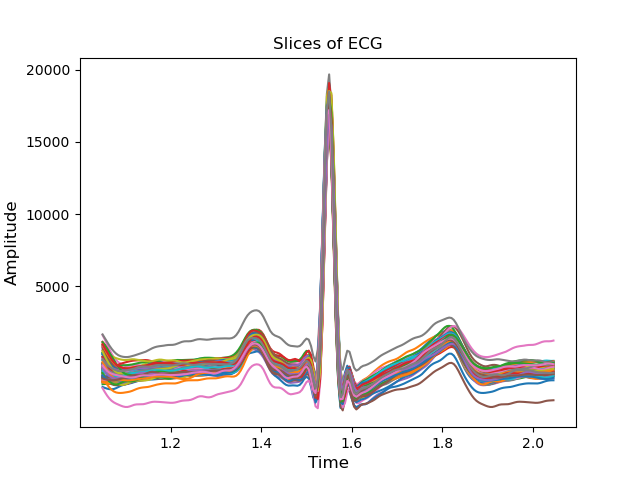

In [53]:
peaks_ecg, _ = sp.signal.find_peaks(resampled_ecg, distance=115)
# peaks_ecg = np.array(peaks_ecg)
peaks_ecg = peaks_ecg[1:]
timeecg = time_new[peaks_ecg[0]-100:peaks_ecg[0]+100]
plt.figure()
plt.title("Slices of ECG")
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
for j in peaks_ecg:
    plt.plot(timeecg, resampled_ecg[j-100:j+100])
    plt.show()

Break
200


<IPython.core.display.Javascript object>


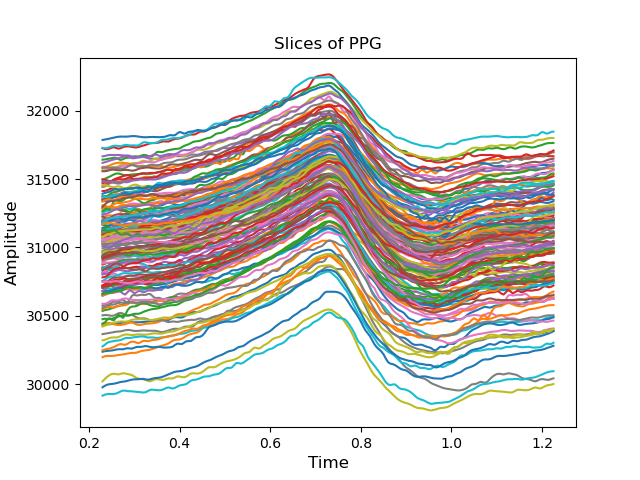

In [54]:
peaks_ppg, _ = sp.signal.find_peaks(resampled_ppg, distance=115)
# peaks_ecg = np.array(peaks_ecg)
peaks_ppg = peaks_ppg[1:]
# time_new= np.array(time_new)
# resampled_ecg = np.array(resampled_ecg)
# print(peaks_ecg)
print('Break')
print(len(resampled_ppg[j-100:j+100]))
timeppg = time_new[peaks_ppg[0]-100:peaks_ppg[0]+100]
plt.figure()
plt.title("Slices of PPG")
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
for j in peaks_ppg:
    plt.plot(timeppg, resampled_ppg[j-100:j+100])
    plt.show()

<IPython.core.display.Javascript object>


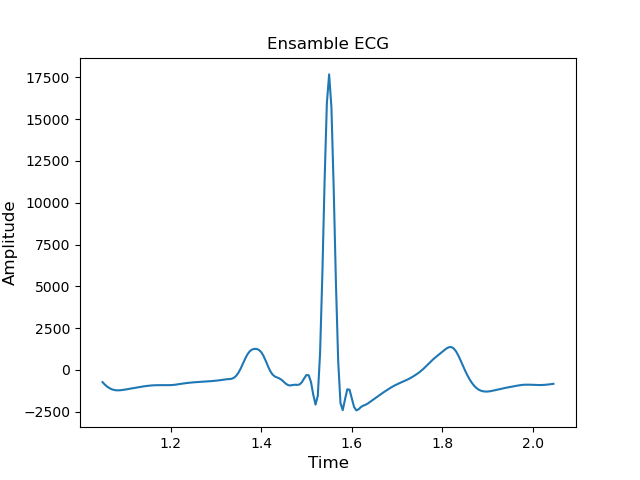

<IPython.core.display.Javascript object>


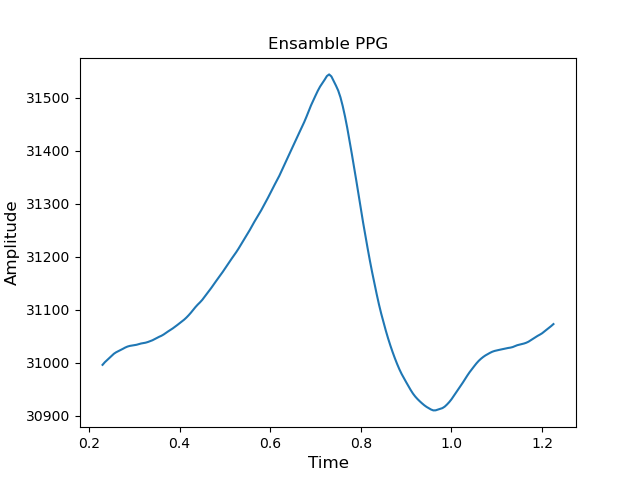

In [55]:
plt.figure()
    
means_ecg = []

for i in range(len(resampled_ecg[j-100:j+100])):
    sum = 0
    for j in peaks_ecg:
        sum = sum + (resampled_ecg[j-100:j+100])[i]
    means_ecg.append(sum/len(peaks_ecg))

plt.plot(timeecg,means_ecg)
plt.title("Ensamble ECG")
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.show()



plt.figure()

means_ppg = []

for i in range(len(resampled_ppg[j-100:j+100])):
    sum = 0
    for j in peaks_ppg:
        sum = sum + (resampled_ppg[j-100:j+100])[i]
    means_ppg.append(sum/len(peaks_ppg))

plt.plot(timeppg,means_ppg)
plt.title("Ensamble PPG")
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.show()

<br><br>3. Compute time intervals from ensemble averaged waveform. Try to find t-wave from ECG and the diastolic peak from PPG.<br><br>

<IPython.core.display.Javascript object>


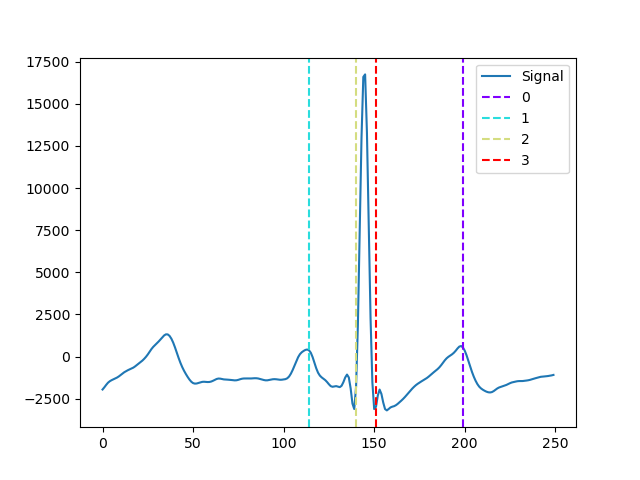

<IPython.core.display.Javascript object>


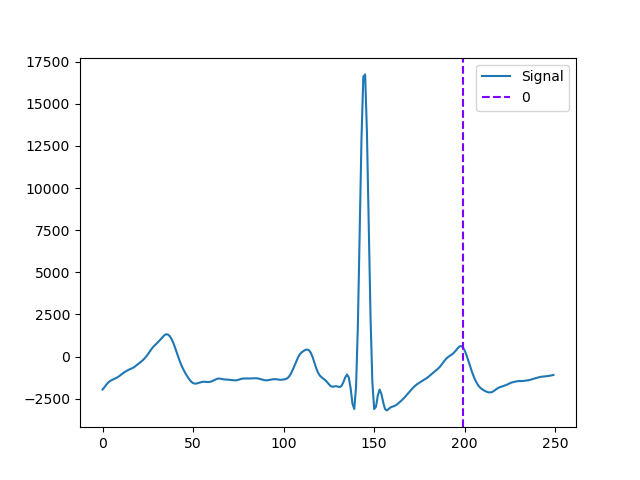

In [56]:

_, rpeaks = nk.ecg_peaks(resampled_ecg, sampling_rate=200)

# epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=200, show=True)
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'],resampled_ecg_clean)
_, waves_peak = nk.ecg_delineate(resampled_ecg, rpeaks, sampling_rate=200, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:1], #
                       waves_peak['ECG_P_Peaks'][:1],
                       waves_peak['ECG_Q_Peaks'][:1],
                       waves_peak['ECG_S_Peaks'][:1]], resampled_ecg[:250])
#find only T-peak
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:1]], resampled_ecg[:250])




<IPython.core.display.Javascript object>


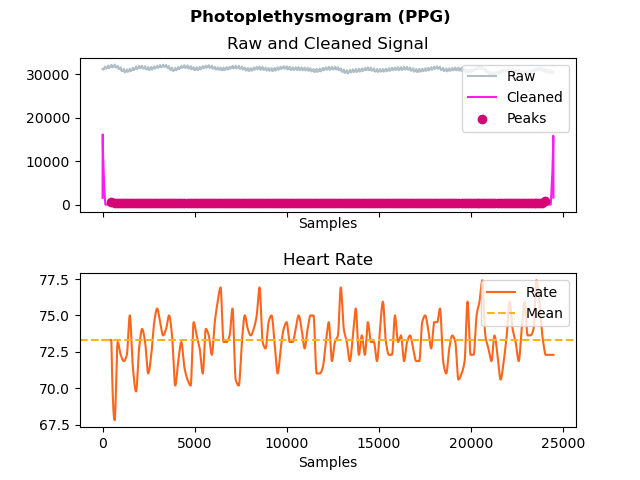

In [57]:

signals, info = nk.ppg_process(resampled_ppg, sampling_rate=200)
fig = nk.ppg_plot(signals)

#not good for out task, but keeping it for future reference

[ 67 100 154]
94
106


<IPython.core.display.Javascript object>


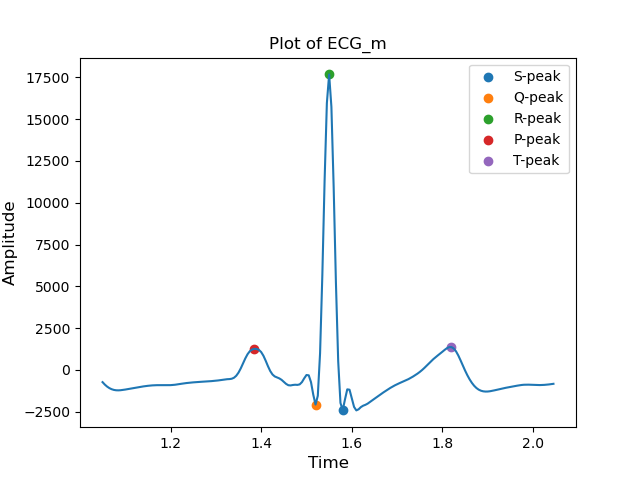

In [58]:
peakpos, _ = sp.signal.find_peaks(means_ecg, distance=30, prominence=(300))
print(peakpos)
# peakneg,_ = sp.signal.find_peaks(means_ecg*-1, distance=1)
# print(peakneg)  #error? problem with python


Qpeak = np.amin(means_ecg[:100])
Speak = np.amin(means_ecg[100:110])

Qpeak_index = means_ecg.index(Qpeak)
print(Qpeak_index)

Speak_index = means_ecg.index(Speak)
print(Speak_index)



plt.figure()
plt.plot(timeecg,means_ecg)

plt.scatter(timeecg[Speak_index],Speak,label='S-peak')
plt.scatter(timeecg[Qpeak_index],Qpeak,label="Q-peak")
plt.scatter(timeecg[100],means_ecg[100],label="R-peak")
plt.scatter(timeecg[67],means_ecg[67],label="P-peak")
plt.scatter(timeecg[154],means_ecg[154],label='T-peak')

plt.legend()
plt.title('Plot of ECG_m')
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.show()




108
169


<IPython.core.display.Javascript object>


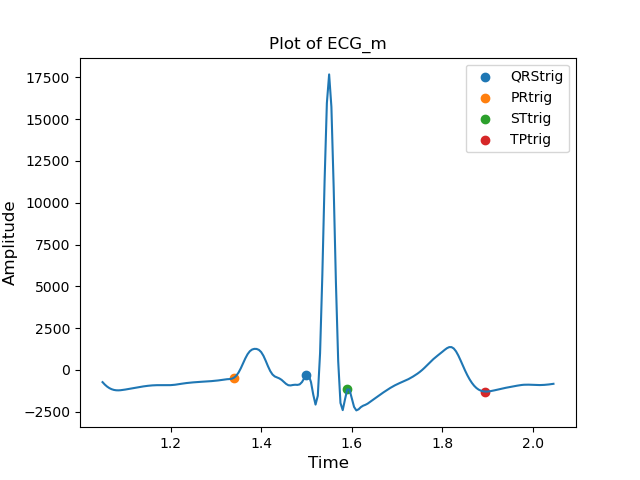

P-R interval =  159.99999999999991 ms
QRS interval =  90.00000000000009 ms
Q-T interval =  395.0 ms
S-T interval =  304.99999999999994 ms


In [59]:
#estimating important segment points based on the position of the peaks


QRStrig = np.amax(means_ecg[77:94])
PRtrig = np.amin(means_ecg[58:67])
STtrig = np.amax(means_ecg[106:110])
TPtrig = np.amin(means_ecg[154:])


QRStrig_index = means_ecg.index(QRStrig)
PRtrig_index = means_ecg.index(PRtrig)
STtrig_index = means_ecg.index(STtrig)
print(STtrig_index)
TPtrig_index = means_ecg.index(TPtrig)
print(TPtrig_index)




plt.figure()
plt.plot(time_new[peaks_ecg[0]-100:peaks_ecg[0]+100],means_ecg)

plt.scatter(timeecg[QRStrig_index],QRStrig,label='QRStrig')
plt.scatter(timeecg[PRtrig_index],PRtrig,label="PRtrig")
plt.scatter(timeecg[STtrig_index],STtrig,label="STtrig")
plt.scatter(timeecg[TPtrig_index],TPtrig,label="TPtrig")


plt.legend()
plt.title('Plot of ECG_m')
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.show()

print("P-R interval = ", (timeecg[QRStrig_index]-timeecg[PRtrig_index])*1000, "ms")
print("QRS interval = ", (timeecg[STtrig_index]-timeecg[QRStrig_index])*1000, "ms")
print("Q-T interval = ", (timeecg[TPtrig_index]-timeecg[QRStrig_index])*1000, "ms")
print("S-T interval = ", (timeecg[TPtrig_index]-timeecg[STtrig_index])*1000, "ms")

<IPython.core.display.Javascript object>


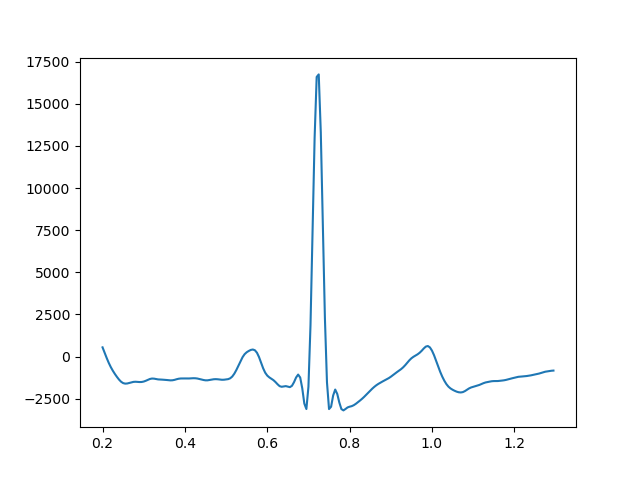

<IPython.core.display.Javascript object>


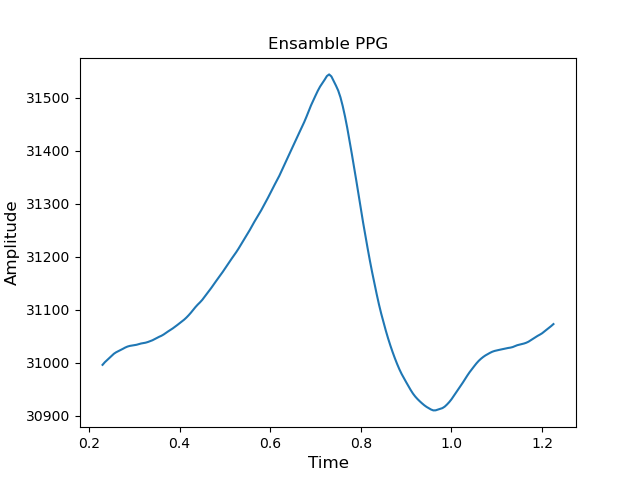

In [60]:
plt.figure()
plt.plot(time_new[40:260],resampled_ecg[40:260])
plt.show()

plt.figure()
plt.plot(timeppg,means_ppg)
plt.title("Ensamble PPG")
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.show()

#given the two wave plots, we can see that the diastolic peak is the peak right after the main peak of the PPG ensamble

[100]
146
169


<IPython.core.display.Javascript object>


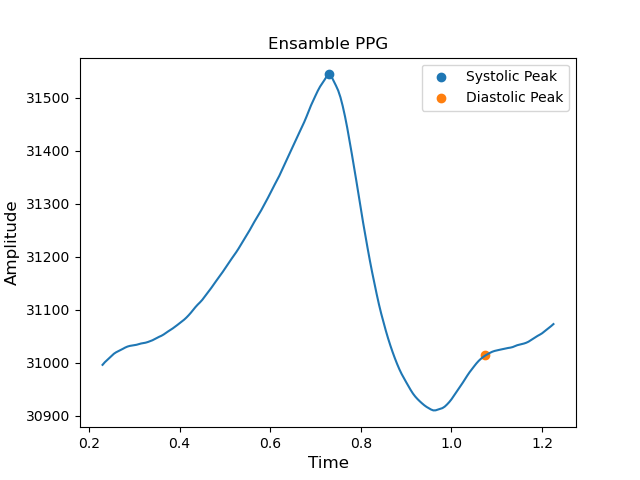

In [61]:
peakPPG, _ = sp.signal.find_peaks(means_ppg, distance=30, prominence=(300))
print(peakPPG)
#peakDias, _ = sp.signal.find_peaks(means_ppg, distance=30, prominence=(None, 31200))

PPGval = np.amin(means_ppg[100:])
PPGval_pos = means_ppg.index(PPGval)

print(PPGval_pos)

peakDias = np.amax(means_ppg[146:170])
peakDias_pos = means_ppg.index(peakDias)
print(peakDias_pos)
plt.figure()
plt.plot(time_new[peaks_ppg[0]-100:peaks_ppg[0]+100],means_ppg)
plt.scatter(timeppg[100],means_ppg[100],label='Systolic Peak')
plt.scatter(timeppg[169],means_ppg[169],label='Diastolic Peak')
plt.legend()
plt.title("Ensamble PPG")
plt.xlabel("Time",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.show()